In [1]:
import pandas as pd
df = pd.read_csv('Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [2]:
# Checking to see if there are any null variables in the dataset
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [3]:
df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [4]:
df.shape

(2484, 4)

In [5]:
# To drop if there are any null values
df.dropna(inplace=True)
df.shape

(2484, 4)

In [6]:
df['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [7]:
df['Resume_html'][0]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME500375979" style="\n      padding-top:0px;\n    "> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_500375979_1_326506904" style="\n      padding-top:0px;\n    "> <div class="name" itemprop="name"> <span class="field fName" id="500375979FNAM1"> </span> <span> </span> <span class="field" id="500375979LNAM1"> HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR</span> </div> </div> </div> <div class="section" id="SECTION_SUMM500375981" style="\n      padding-top:0px;\n    "> <div class="heading bottomborder"> <div class="sectiontitle" id="SECTNAME_SUMM500375981"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_500375981_1_326506917" style="\n      padding-top:0px;\n    "> <div class="field singlecolumn" id="500375981FRFM1"> <p align="LEFT"> Dedicated Customer Service Manager with 15+ years of experience in H

In [8]:
# Dropping ID, resume_html columns
df.drop(columns = ['ID', 'Resume_html'], inplace = True)
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


# Data Preprocessing

In [9]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re

In [10]:
stemmer = nltk.stem.porter.PorterStemmer()

def preprocess(text):
    ### Convert to lower case
    text = text.lower()
    
    ### Remove integers, punctuations with the help of Regular Expression
    text = re.sub('[^a-zA-Z]',' ', text)
    # Tokenization
    text = nltk.tokenize.word_tokenize(text)
    # Removing stop words
    text = [i for i in text if not i in nltk.corpus.stopwords.words('english')]
    # Stemming
    text = [stemmer.stem(i) for i in text]
    
    return ' '.join(text)

In [14]:
df['Resume_str'] = df['Resume_str'].map(preprocess)

In [15]:
df.head()

,Resume_str,Category
0,hr administr market associ hr administr summar...,HR
1,hr specialist us hr oper summari versatil medi...,HR
2,hr director summari year experi recruit plu ye...,HR
3,hr specialist summari dedic driven dynam year ...,HR
4,hr manag skill highlight hr skill hr depart st...,HR


# Data exploration

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [20]:
df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

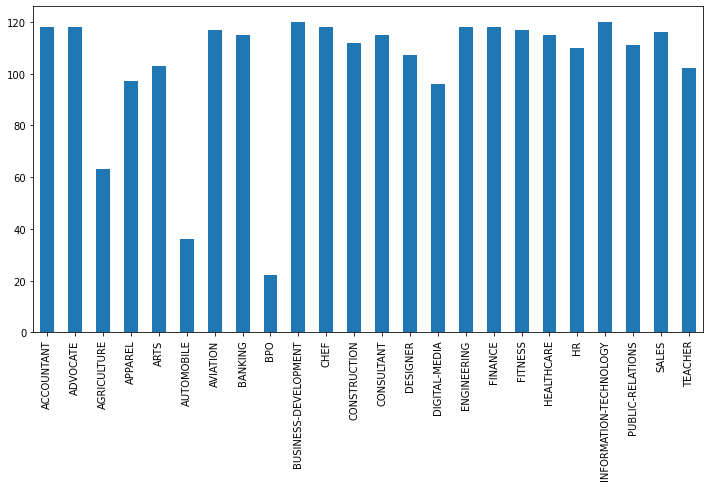

In [22]:
# Visualization with matplotlib
import matplotlib.pyplot as plt

df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

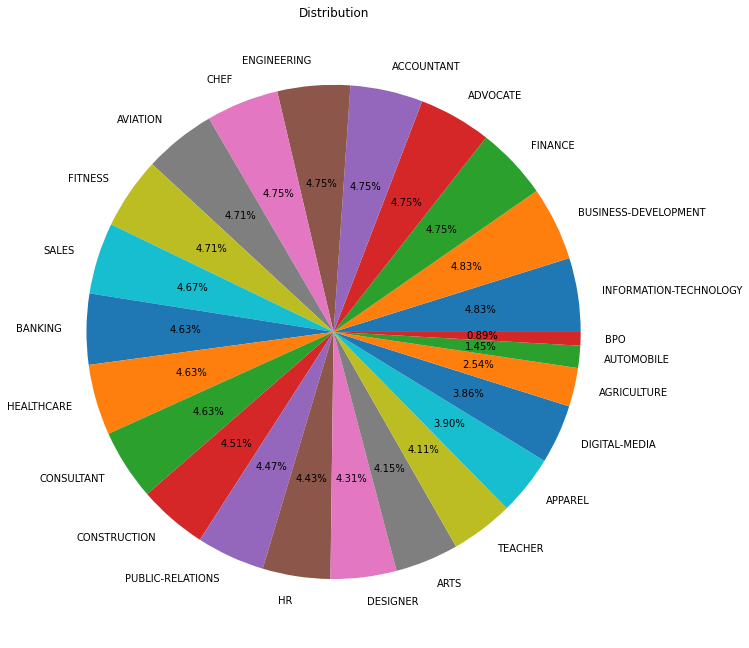

In [24]:
import numpy as np
from matplotlib.gridspec import GridSpec

count = df['Category'].value_counts()
label = df['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()